In [1]:
import ROOT as rt
import pickle
import json

Welcome to JupyROOT 6.26/08


In [2]:
setting={}
with open('config/Settrain.json') as json_file:
    data = json.load(json_file)
    setting=data
VERSION = setting["VERSION"]

model_masses = setting["ALL_MASSES"]
model_masses.remove('Zp-2500_CH-1095')

INPUTDIR = 'Outputs/ee/'
file_prefix = 'nested_dic_roc_'
# file_postfix = 'PNN_'+VERSION
file_postfix = 'PNN_'+'2803_equalpropv1'

dic_PNN = {}
with open(INPUTDIR+file_prefix+file_postfix+'.pkl', 'rb') as f:
    dic_PNN = pickle.load(f)

dic_dedicated = {}
for mass in model_masses:
    with open(INPUTDIR+file_prefix+mass+'_'+VERSION+'.pkl', 'rb') as f:
        dic_nested_roc = pickle.load(f)
        
        dic_dedicated[mass] = dic_nested_roc['trial_0']

Info in <TCanvas::Print>: pdf file Outputs/ee/Dedicated/AUC.pdf has been created


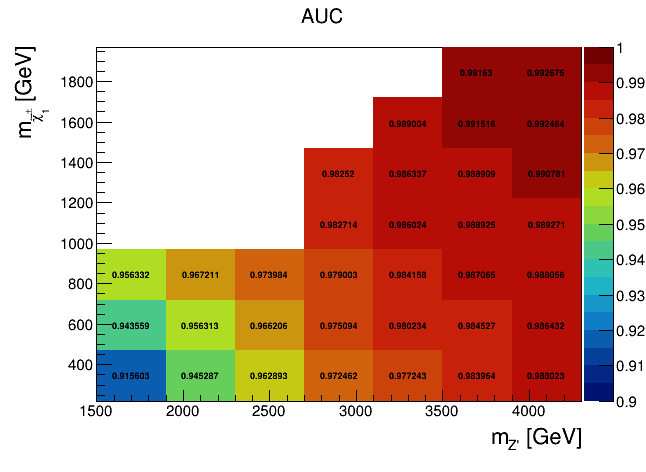

In [3]:
Zp_mass=[1700, 2100, 2500, 2900, 3300, 3700, 4100]
CH_mass=[345, 595, 845, 1095, 1345, 1595, 1845]
c1=rt.TCanvas("c1", "c1", 650, 500)
c1.SetLeftMargin(0.15)
c1.SetBottomMargin(0.15)
h2d1=rt.TH2D("h2d1", "", len(Zp_mass), Zp_mass[0]-200, Zp_mass[-1]+200, len(CH_mass), CH_mass[0]-125, CH_mass[-1]+125)
h2d1.SetTitle("AUC")

for key in dic_dedicated:
    if not "Zp" in key:
        continue
    tmp=key.replace('_', '-')
    tmp=tmp.split('-')
    
    MZp=tmp[1]
    MCH=tmp[3]
    binx=Zp_mass.index(int(MZp))+1
    biny=CH_mass.index(int(MCH))+1
    h2d1.SetBinContent(binx, biny, dic_dedicated[key]['auc'])
# missing bin by hand

# set_palette("rainbow",255)
rt.gStyle.SetOptStat(0)
rt.gStyle.SetPalette(55)

h2d1.Draw("colz text")
h2d1.SetYTitle("m_{#tilde#chi_{1}^{#pm}} [GeV]")
h2d1.SetXTitle("m_{Z'} [GeV]")
h2d1.GetYaxis().SetTitleSize(0.05)
h2d1.GetXaxis().SetTitleSize(0.05)
h2d1.GetZaxis().SetRangeUser(0.9, 1)
latex=rt.TLatex()

c1.Draw()
c1.SaveAs(INPUTDIR+'AUC.pdf')

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1
Warning in <TROOT::Append>: Replacing existing TH1: h2d1 (Potential memory leak).
Info in <TCanvas::Print>: pdf file Outputs/ee/Dedicated/sig_ks_stat.pdf has been created


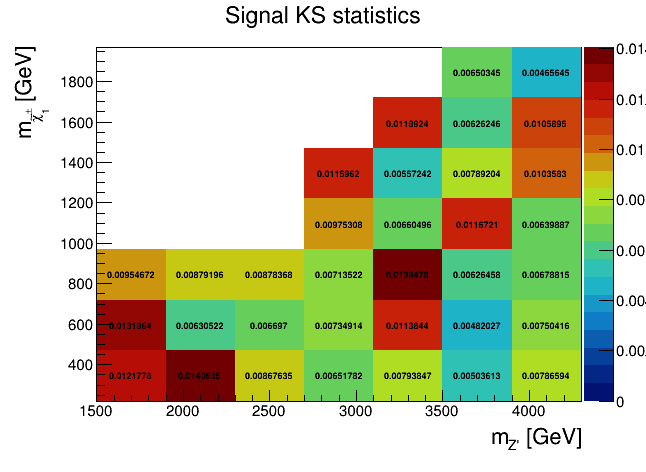

In [4]:
Zp_mass=[1700, 2100, 2500, 2900, 3300, 3700, 4100]
CH_mass=[345, 595, 845, 1095, 1345, 1595, 1845]
c1=rt.TCanvas("c1", "c1", 650, 500)
c1.SetLeftMargin(0.15)
c1.SetBottomMargin(0.15)
h2d1=rt.TH2D("h2d1", "", len(Zp_mass), Zp_mass[0]-200, Zp_mass[-1]+200, len(CH_mass), CH_mass[0]-125, CH_mass[-1]+125)
h2d1.SetTitle("Signal KS statistics")

for key in dic_dedicated:
    if not "Zp" in key:
        continue
    tmp=key.replace('_', '-')
    tmp=tmp.split('-')
    
    MZp=tmp[1]
    MCH=tmp[3]
    binx=Zp_mass.index(int(MZp))+1
    biny=CH_mass.index(int(MCH))+1
    h2d1.SetBinContent(binx, biny, dic_dedicated[key]['sig_stat'])
# missing bin by hand

# set_palette("rainbow",255)
rt.gStyle.SetOptStat(0)
rt.gStyle.SetPalette(55)

h2d1.Draw("colz text")
h2d1.SetYTitle("m_{#tilde#chi_{1}^{#pm}} [GeV]")
h2d1.SetXTitle("m_{Z'} [GeV]")
h2d1.GetYaxis().SetTitleSize(0.05)
h2d1.GetXaxis().SetTitleSize(0.05)
# h2d1.GetZaxis().SetRangeUser(0.9, 1)
latex=rt.TLatex()

c1.Draw()
c1.SaveAs(INPUTDIR+'sig_ks_stat.pdf')

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1
Warning in <TROOT::Append>: Replacing existing TH1: h2d1 (Potential memory leak).
Info in <TCanvas::Print>: pdf file Outputs/ee/Dedicated/sig_ks_pval.pdf has been created


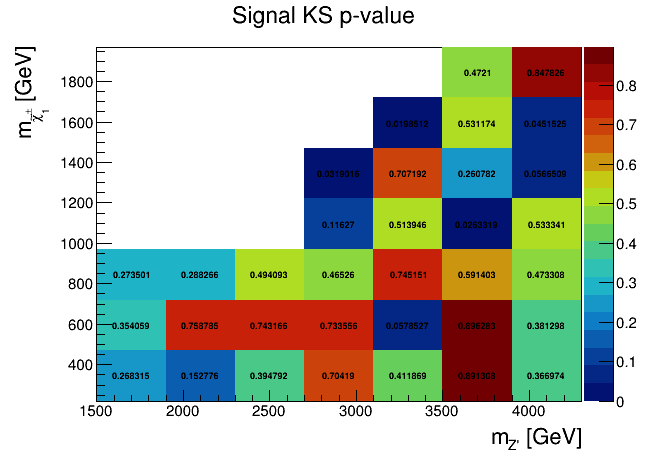

In [5]:
Zp_mass=[1700, 2100, 2500, 2900, 3300, 3700, 4100]
CH_mass=[345, 595, 845, 1095, 1345, 1595, 1845]
c1=rt.TCanvas("c1", "c1", 650, 500)
c1.SetLeftMargin(0.15)
c1.SetBottomMargin(0.15)
h2d1=rt.TH2D("h2d1", "", len(Zp_mass), Zp_mass[0]-200, Zp_mass[-1]+200, len(CH_mass), CH_mass[0]-125, CH_mass[-1]+125)
h2d1.SetTitle("Signal KS p-value")

for key in dic_dedicated:
    if not "Zp" in key:
        continue
    tmp=key.replace('_', '-')
    tmp=tmp.split('-')
    
    MZp=tmp[1]
    MCH=tmp[3]
    binx=Zp_mass.index(int(MZp))+1
    biny=CH_mass.index(int(MCH))+1
    h2d1.SetBinContent(binx, biny, dic_dedicated[key]['sig_pval'])
# missing bin by hand

# set_palette("rainbow",255)
rt.gStyle.SetOptStat(0)
rt.gStyle.SetPalette(55)

h2d1.Draw("colz text")
h2d1.SetYTitle("m_{#tilde#chi_{1}^{#pm}} [GeV]")
h2d1.SetXTitle("m_{Z'} [GeV]")
h2d1.GetYaxis().SetTitleSize(0.05)
h2d1.GetXaxis().SetTitleSize(0.05)
# h2d1.GetZaxis().SetRangeUser(0.9, 1)
latex=rt.TLatex()

c1.Draw()
c1.SaveAs(INPUTDIR+'sig_ks_pval.pdf')

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1
Warning in <TROOT::Append>: Replacing existing TH1: h2d1 (Potential memory leak).
Info in <TCanvas::Print>: pdf file Outputs/ee/Dedicated/bkg_ks_stat.pdf has been created


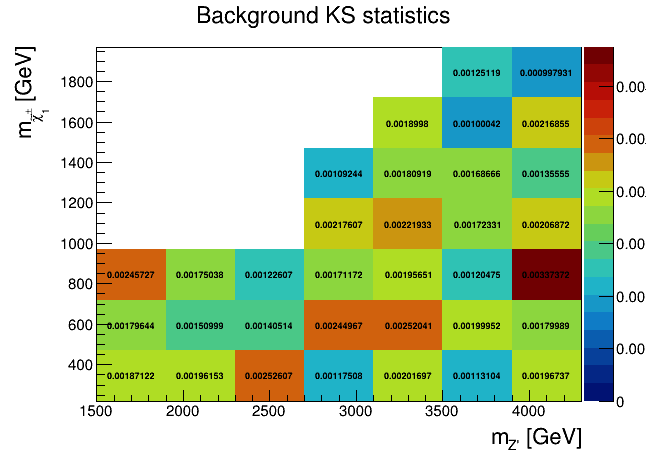

In [6]:
Zp_mass=[1700, 2100, 2500, 2900, 3300, 3700, 4100]
CH_mass=[345, 595, 845, 1095, 1345, 1595, 1845]
c1=rt.TCanvas("c1", "c1", 650, 500)
c1.SetLeftMargin(0.15)
c1.SetBottomMargin(0.15)
h2d1=rt.TH2D("h2d1", "", len(Zp_mass), Zp_mass[0]-200, Zp_mass[-1]+200, len(CH_mass), CH_mass[0]-125, CH_mass[-1]+125)
h2d1.SetTitle("Background KS statistics")

for key in dic_dedicated:
    if not "Zp" in key:
        continue
    tmp=key.replace('_', '-')
    tmp=tmp.split('-')
    
    MZp=tmp[1]
    MCH=tmp[3]
    binx=Zp_mass.index(int(MZp))+1
    biny=CH_mass.index(int(MCH))+1
    h2d1.SetBinContent(binx, biny, dic_dedicated[key]['bkg_stat'])
# missing bin by hand

# set_palette("rainbow",255)
rt.gStyle.SetOptStat(0)
rt.gStyle.SetPalette(55)

h2d1.Draw("colz text")
h2d1.SetYTitle("m_{#tilde#chi_{1}^{#pm}} [GeV]")
h2d1.SetXTitle("m_{Z'} [GeV]")
h2d1.GetYaxis().SetTitleSize(0.05)
h2d1.GetXaxis().SetTitleSize(0.05)
# h2d1.GetZaxis().SetRangeUser(0.9, 1)
latex=rt.TLatex()

c1.Draw()
c1.SaveAs(INPUTDIR+'bkg_ks_stat.pdf')

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1
Warning in <TROOT::Append>: Replacing existing TH1: h2d1 (Potential memory leak).
Info in <TCanvas::Print>: pdf file Outputs/ee/Dedicated/bkg_ks_pval.pdf has been created


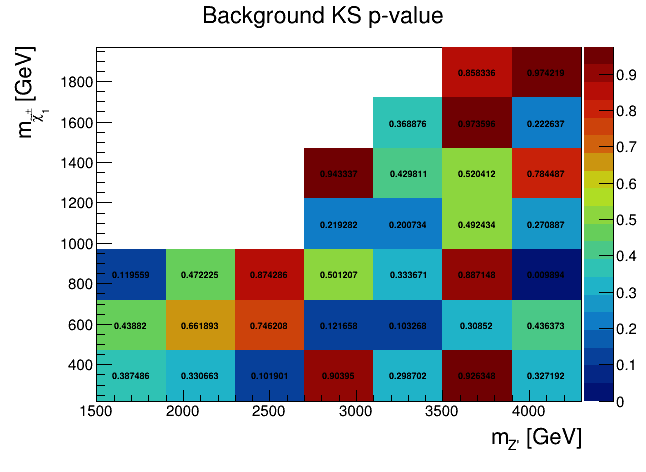

In [7]:
Zp_mass=[1700, 2100, 2500, 2900, 3300, 3700, 4100]
CH_mass=[345, 595, 845, 1095, 1345, 1595, 1845]
c1=rt.TCanvas("c1", "c1", 650, 500)
c1.SetLeftMargin(0.15)
c1.SetBottomMargin(0.15)
h2d1=rt.TH2D("h2d1", "", len(Zp_mass), Zp_mass[0]-200, Zp_mass[-1]+200, len(CH_mass), CH_mass[0]-125, CH_mass[-1]+125)
h2d1.SetTitle("Background KS p-value")

for key in dic_dedicated:
    if not "Zp" in key:
        continue
    tmp=key.replace('_', '-')
    tmp=tmp.split('-')
    
    MZp=tmp[1]
    MCH=tmp[3]
    binx=Zp_mass.index(int(MZp))+1
    biny=CH_mass.index(int(MCH))+1
    h2d1.SetBinContent(binx, biny, dic_dedicated[key]['bkg_pval'])
# missing bin by hand

# set_palette("rainbow",255)
rt.gStyle.SetOptStat(0)
rt.gStyle.SetPalette(55)

h2d1.Draw("colz text")
h2d1.SetYTitle("m_{#tilde#chi_{1}^{#pm}} [GeV]")
h2d1.SetXTitle("m_{Z'} [GeV]")
h2d1.GetYaxis().SetTitleSize(0.05)
h2d1.GetXaxis().SetTitleSize(0.05)
# h2d1.GetZaxis().SetRangeUser(0.9, 1)
latex=rt.TLatex()

c1.Draw()
c1.SaveAs(INPUTDIR+'bkg_ks_pval.pdf')